# *0. Ознакомиться с [блокнотом](https://colab.research.google.com/drive/1PwN8igT5w2xArBGmM6rvO9pVRQMh-FQn?usp=sharing)

# 1. Дерево решений для классификации

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [2]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

--2025-05-27 21:09:21--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Resolving drive.google.com (drive.google.com)... 142.250.101.101, 142.250.101.138, 142.250.101.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G&export=download [following]
--2025-05-27 21:09:21--  https://drive.usercontent.google.com/download?id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941524 (2.8M) [application/octet-stream]
Saving to: ‘cardio.csv’

cardio.csv          100%[===================>]   2.80M  --.-KB

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [3]:
import pandas as pd
df = pd.read_csv('cardio.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [5]:
df['age'] = round(df['age'] / 365)

## 1. Вводная

### 1.1 Сколько вопросов будет задано на первом этапе

Посчитайте, сколько вопросов задаст дерево решений в самый первый раз, если использовать все признаки из списка full_features.

In [9]:
unique_counts = {feature: df[feature].nunique() for feature in full_features}
total_questions = sum(unique_counts.values())

print(f"Количество вопросов на первом этапе: {total_questions}")

Количество вопросов на первом этапе: 748


### 1.2 Упростите задачу

Вопросов получилось достаточно, не будет моделировать столько вопросов, а попробуем уменьшить их количество.

Возьмите только два признака: weight и gluc.
А так же возьмите только 10 первых объектов.

In [11]:
df_small = df[['weight', 'gluc', 'cardio']].head(10)
df_small

,weight,gluc,cardio
0,62.0,1,0
1,85.0,1,1
2,64.0,1,1
3,82.0,1,1
4,56.0,1,0
5,67.0,2,0
6,93.0,1,0
7,95.0,3,1
8,71.0,1,0
9,68.0,1,0


### 1.3 Посчитайте еще раз, сколько будет вопросов

Количество вопросов (разбиений) на первом уровне: 13


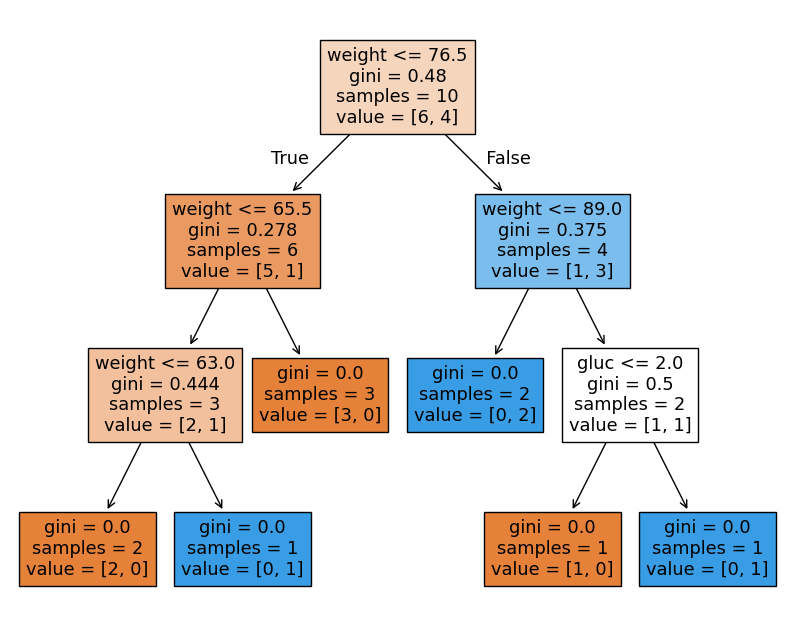

In [15]:
X = df_small[['weight', 'gluc']]
y = df_small['cardio']
unique_counts = X.nunique()
n_questions = sum(unique_counts)
print(f'Количество вопросов (разбиений) на первом уровне: {n_questions}')
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)
plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=['weight', 'gluc'], filled=True)
plt.show()

С таким количеством вопросов уже можем работать и разбираться в устройству дерева решений.

## 2. Устройство дерева решений

### 2.1 Обучите дерево решений

Обучите дерево решений из sklearn'a с атрибутом `random_state=1`.

In [26]:
from sklearn.tree import DecisionTreeClassifier
X_small = df_small[['weight', 'gluc']]
y_small = df_small['cardio']
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_small, y_small)

DecisionTreeClassifier(random_state=1)

### 2.2 Отрисуйте обученное дерево решений

Нарисуйте дерево решений, которое у вас получилось после обучения. Сделайте отрисовку такой, чтобы можно было понять, какие вопросы задаются

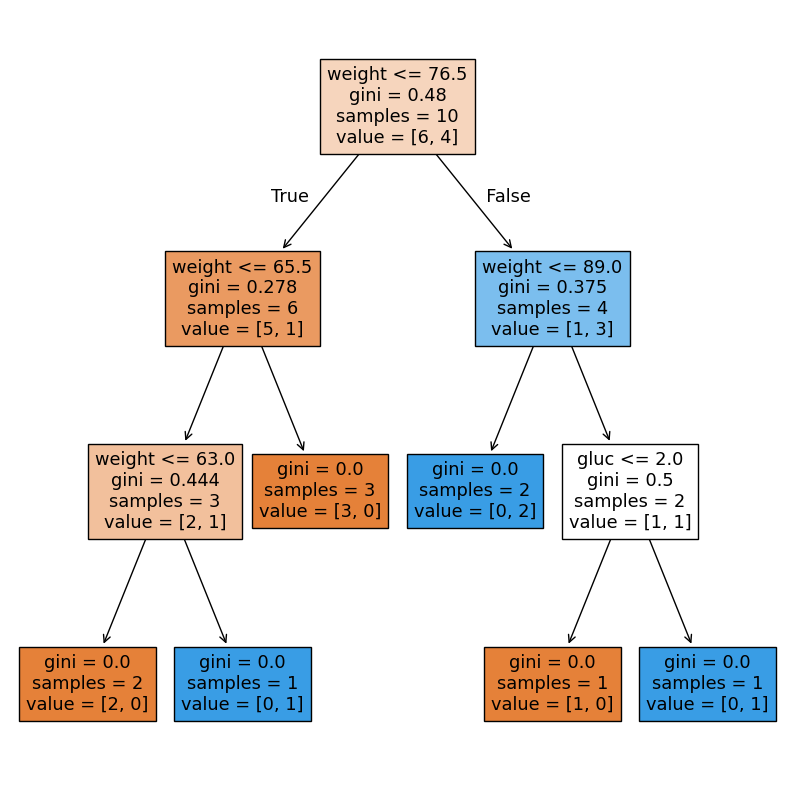

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf, feature_names=['weight', 'gluc'], filled=True)
plt.show()

### 2.3 Посчитайте, сколько вершин получилось

In [30]:
n_nodes = clf.tree_.node_count
print(f"Количество вершин в дереве: {n_nodes}")

Количество вершин в дереве: 11


### 2.4 Посчитайте, сколько листов получилось

In [31]:
n_leaves = clf.tree_.n_leaves
print(f"Количество листов в дереве: {n_leaves}")

Количество листов в дереве: 6


### 2.5 Посмотрите, почему не получилось сделать разбиение ещё на два узла в крайнем левом узле.

В узле, где
```
gini=0.5
samples=2
value=[1, 1]
```

In [32]:
# Ваш код/вывод здесь
# все получилось


## 3. Вспомогательные функции

Для того, что бы дальше сравнивать между собой объекты нужно реализовать две вспомогательные функции.

### 3.1 Функция подсчета критерия Джини

Функция должна принимать список целевых значений, считать критерий информативности и выдавать одно значение - критерий Джини.

In [34]:
def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    gini_value = 1 - np.sum(probs ** 2)
    return gini_value

### 3.2 Проверка функции gini

Посчитайте критерий информативности в исходной выборке и вы должны получить точно такое же значение, как и было на визуализации дерева решений в его корне.

In [35]:
import numpy as np

In [36]:
gini_root = gini(y_small)
print(f"Критерий Джини в корне: {gini_root}")

Критерий Джини в корне: 0.48


### 3.3 Функция подсчета прироста информации

Функция должна принимать целевые значения левой подвыборки, правой подвыборки и исходной вершины, а выдавать должна одно значение - прирост информации, подсчитанный на критерии информативности Джини.

In [37]:
def information_gain(y_parent, y_left, y_right):
    gini_parent = gini(y_parent)
    n_parent = len(y_parent)
    n_left = len(y_left)
    n_right = len(y_right)
    gain = gini_parent - (n_left / n_parent * gini(y_left) + n_right / n_parent * gini(y_right))
    return gain

In [40]:
# Разбиение по признаку 'weight' (например, среднее значение веса)
split_value = X_train['weight'].mean()

# Формируем левую и правую подвыборки
left_mask = X_train['weight'] < split_value
right_mask = X_train['weight'] >= split_value

# Целевые значения для исходной выборки, левой и правой подвыборок
root_values = y_train
left_values = y_train[left_mask]
right_values = y_train[right_mask]

# Вычисляем прирост информации
info_gain = information_gain(root_values, left_values, right_values)
print(f'Прирост информации при разбиении по весу: {info_gain:.4f}')

Прирост информации при разбиении по весу: 0.0116


Теперь вспомогательные функции готовы можем моделировать работу обученного дерева решений.

## 4. Процесс построения дерева решений

### 4.1 Получение первого вопроса


4.1.1 Пройдитесь по всем возможным вопросам для исходного набора данных


Можете сохранять полученные значения прироста информации в датафрейм в удобную для вас структуру данных.

In [38]:
import pandas as pd
import numpy as np

In [39]:
results = []
for feature in ['weight', 'gluc']:
    thresholds = sorted(df_small[feature].unique())
    for threshold in thresholds:
        left_mask = df_small[feature] <= threshold
        right_mask = df_small[feature] > threshold
        y_left = df_small[left_mask]['cardio']
        y_right = df_small[right_mask]['cardio']
        if len(y_left) > 0 and len(y_right) > 0:
            gain = information_gain(df_small['cardio'], y_left, y_right)
            results.append({'feature': feature, 'threshold': threshold, 'gain': gain})
results_df = pd.DataFrame(results)
print(results_df)

   feature  threshold      gain
0   weight       56.0  0.035556
1   weight       62.0  0.080000
2   weight       64.0  0.003810
3   weight       67.0  0.030000
4   weight       68.0  0.080000
5   weight       71.0  0.163333
6   weight       82.0  0.060952
7   weight       85.0  0.005000
8   weight       93.0  0.080000
9     gluc        1.0  0.005000
10    gluc        2.0  0.080000


4.1.2 Найдите самый лучший вопрос, опираясь на прирост информации

In [41]:
best_question = results_df.loc[results_df['gain'].idxmax()]
print(f"Лучший вопрос: признак {best_question['feature']} <= {best_question['threshold']}, прирост информации: {best_question['gain']}")

Лучший вопрос: признак weight <= 71.0, прирост информации: 0.16333333333333333


4.1.3. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [42]:
best_feature = best_question['feature']
best_threshold = best_question['threshold']
df_left = df_small[df_small[best_feature] <= best_threshold]
df_right = df_small[df_small[best_feature] > best_threshold]
print("Левая подвыборка:\n", df_left)
print("Правая подвыборка:\n", df_right)

Левая подвыборка:
    weight  gluc  cardio
0    62.0     1       0
2    64.0     1       1
4    56.0     1       0
5    67.0     2       0
8    71.0     1       0
9    68.0     1       0
Правая подвыборка:
    weight  gluc  cardio
1    85.0     1       1
3    82.0     1       1
6    93.0     1       0
7    95.0     3       1


4.1.4. Проверьте себя через визуализацию дерева решений

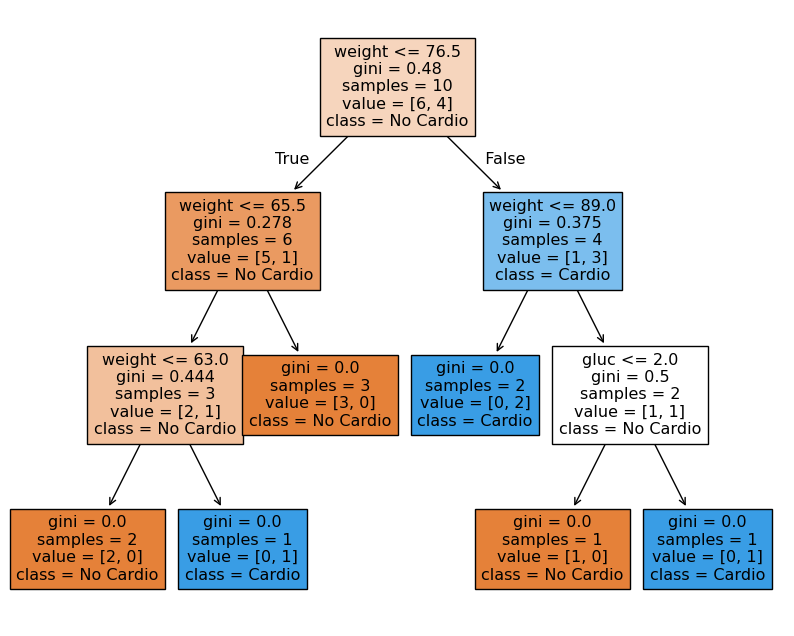

In [43]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=['weight', 'gluc'], class_names=['No Cardio', 'Cardio'], filled=True)
plt.show()

### 4.2 Получение второго вопроса


4.2.1. Глядя на df_left и df_right, посмотрите, где можно сделать ещё разбиение

In [45]:
print(f"Левая подвыборка: {len(df_left)} объектов, Джини: {gini(df_left['cardio'])}")
print(f"Правая подвыборка: {len(df_right)} объектов, Джини: {gini(df_right['cardio'])}")

Левая подвыборка: 6 объектов, Джини: 0.2777777777777777
Правая подвыборка: 4 объектов, Джини: 0.375


4.2.2. Пройдитесь по всем признакам в выбранной подвыборке

In [46]:
results_right = []
for feature in ['weight', 'gluc']:
    thresholds = sorted(df_right[feature].unique())
    for threshold in thresholds:
        left_mask = df_right[feature] <= threshold
        right_mask = df_right[feature] > threshold
        y_left = df_right[left_mask]['cardio']
        y_right = df_right[right_mask]['cardio']
        if len(y_left) > 0 and len(y_right) > 0:
            gain = information_gain(df_right['cardio'], y_left, y_right)
            results_right.append({'feature': feature, 'threshold': threshold, 'gain': gain})
results_right_df = pd.DataFrame(results_right)
print(results_right_df)

  feature  threshold      gain
0  weight       82.0  0.041667
1  weight       85.0  0.125000
2  weight       93.0  0.041667
3    gluc        1.0  0.041667


4.2.3 Найдите самый лучший вопрос, опираясь на прирост информации

In [47]:
best_question_right = results_right_df.loc[results_right_df['gain'].idxmax()]
print(f"Лучший вопрос для df_right: признак {best_question_right['feature']} <= {best_question_right['threshold']}, прирост информации: {best_question_right['gain']}")

Лучший вопрос для df_right: признак weight <= 85.0, прирост информации: 0.125


4.2.4. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [48]:
best_feature_right = best_question_right['feature']
best_threshold_right = best_question_right['threshold']
df_right_left = df_right[df_right[best_feature_right] <= best_threshold_right]
df_right_right = df_right[df_right[best_feature_right] > best_threshold_right]
print("Левая подвыборка df_right:\n", df_right_left)
print("Правая подвыборка df_right:\n", df_right_right)

Левая подвыборка df_right:
    weight  gluc  cardio
1    85.0     1       1
3    82.0     1       1
Правая подвыборка df_right:
    weight  gluc  cardio
6    93.0     1       0
7    95.0     3       1


4.2.5. Проверьте себя через визуализацию дерева решений

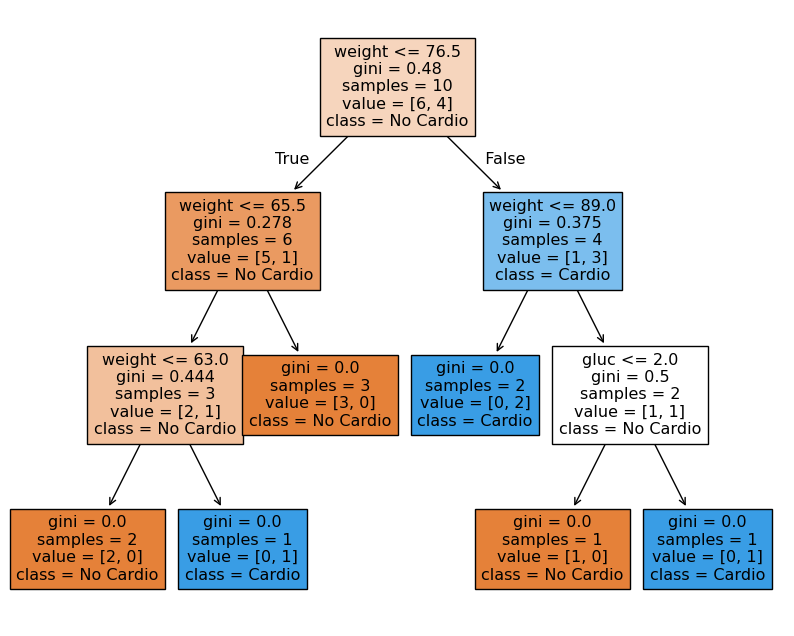

In [49]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=['weight', 'gluc'], class_names=['No Cardio', 'Cardio'], filled=True)
plt.show()

4.2.6. Если что-то не сошлось, посмотрите, в чем может быть проблема

In [51]:
# Ваш код/вывод здесь
# сошлось

# 2. Дерево решений для регрессии

In [52]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получение данных load_breat_cancer

Будем работать с набором данных для задачи регрессии `load_diabetes`, который можно получить из стандартных датасетов в `sklearn'e`.

После `load_diabetes()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [53]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [54]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [55]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разобьем выборку на две: обучающую и тестовую.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### 1.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [57]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=3)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=3)

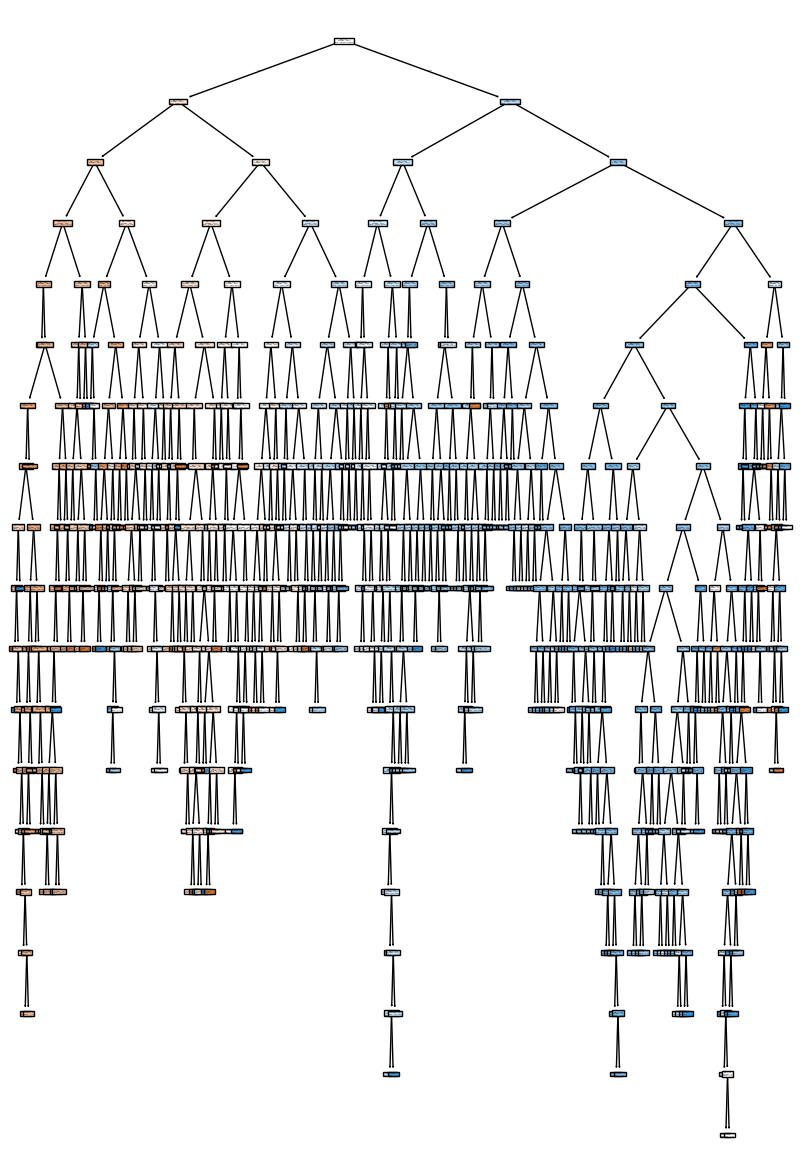

In [58]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 15))
plot_tree(tree, feature_names=features, filled=True);

### 1.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"MSE (train): {mse_train}")
print(f"MSE (test): {mse_test}")
print(f"R2 (train): {r2_train}")
print(f"R2 (test): {r2_test}")

MSE (train): 0.0
MSE (test): 5670.820224719101
R2 (train): 1.0
R2 (test): -0.04730131544961891


Сделайте вывод, насколько хорошо обучилась модель

In [75]:
print("Модель переобучена. Нужно настроить гиперпараметры, чтобы улучшить обобщение.")

Модель переобучена. Нужно настроить гиперпараметры, чтобы улучшить обобщение.


### 1.3. Изменение метрики

Попробуйте поизменять известные параметры для того, чтобы метрика стала лучше.

In [61]:
reg_tuned = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=3)
reg_tuned.fit(X_train, y_train)
y_train_pred_tuned = reg_tuned.predict(X_train)
y_test_pred_tuned = reg_tuned.predict(X_test)
mse_train_tuned = mean_squared_error(y_train, y_train_pred_tuned)
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
r2_train_tuned = r2_score(y_train, y_train_pred_tuned)
r2_test_tuned = r2_score(y_test, y_test_pred_tuned)
print(f"Tuned MSE (train): {mse_train_tuned}")
print(f"Tuned MSE (test): {mse_test_tuned}")
print(f"Tuned R2 (train): {r2_train_tuned}")
print(f"Tuned R2 (test): {r2_test_tuned}")

Tuned MSE (train): 2080.3709092112595
Tuned MSE (test): 4472.929014695939
Tuned R2 (train): 0.6561152723005341
Tuned R2 (test): 0.17392824047144484


In [ ]:
tree_2 = DecisionTreeRegressor(random_state=1,
                               max_depth=10,
                               max_leaf_nodes=10,
                               min_samples_leaf=10)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, min_samples_leaf=10,
                      random_state=1)

In [76]:
print("Настройка гиперпараметров снизила переобучение. Но нужна дальнейшая оптимизация.")

Настройка гиперпараметров снизила переобучение. Но нужна дальнейшая оптимизация.


### 2. Получение данных make_regression

Для второго примера возьмем самодельный набор данных для задачи регрессии `make_regression`, который можно получить из стандартных датасетов в `sklearn'e`.

Сгенерируем себе 100к объектов, которые описываются 20 признаками, из них 12 будут дейтсвительно полезными.

In [63]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [64]:
X.shape, y.shape

((100000, 20), (100000,))

Разобьем выборку на две: обучающую и тестовую.

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

### 2.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [66]:
reg_make = DecisionTreeRegressor(random_state=3)
reg_make.fit(X_train, y_train)

DecisionTreeRegressor(random_state=3)

### 2.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [67]:
y_train_pred_make = reg_make.predict(X_train)
y_test_pred_make = reg_make.predict(X_test)
mse_train_make = mean_squared_error(y_train, y_train_pred_make)
mse_test_make = mean_squared_error(y_test, y_test_pred_make)
r2_train_make = r2_score(y_train, y_train_pred_make)
r2_test_make = r2_score(y_test, y_test_pred_make)
print(f"MSE (train): {mse_train_make}")
print(f"MSE (test): {mse_test_make}")
print(f"R2 (train): {r2_train_make}")
print(f"R2 (test): {r2_test_make}")

MSE (train): 0.0
MSE (test): 16700.112228964506
R2 (train): 1.0
R2 (test): 0.6906696916704596


Сделайте вывод, насколько хорошо обучилась модель

In [77]:
print("Модель переобучена. Требуется настройка гиперпараметров.")

Модель переобучена. Требуется настройка гиперпараметров.


### 2.3. Перебор гиперпараметров

Осуществите перебор параметров для получения лучших результатов (GridSearchCV, см. подход из п.0).

In [70]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [71]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=3), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший R2: {grid_search.best_score_}")
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test)
print(f"R2 на тесте: {r2_score(y_test, y_test_pred_best)}")

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Лучший R2: 0.6799962254424775
R2 на тесте: 0.6827368496381083


In [78]:
print("Переобучение снижено, но R² всё ещё умеренный, возможна дальнейшая оптимизация.")

Переобучение снижено, но R² всё ещё умеренный, возможна дальнейшая оптимизация.
